This code is used to identify and append the year, make, and model of VINs identified in all database records.

The purpose of this code is to reduce variation and create separation of concerns in data interpretation.

This is an early attempt to control for new updates to the fleet by isolating the variables associated with them.

In [ ]:
import pandas as pd

Large amounts of variation exist in the records.

The variations can be grouped as such:
(Vehicle type) * (# of records)

VIN can be used to identify vehicle type.

Corporate of vehicle types supported by CDR:

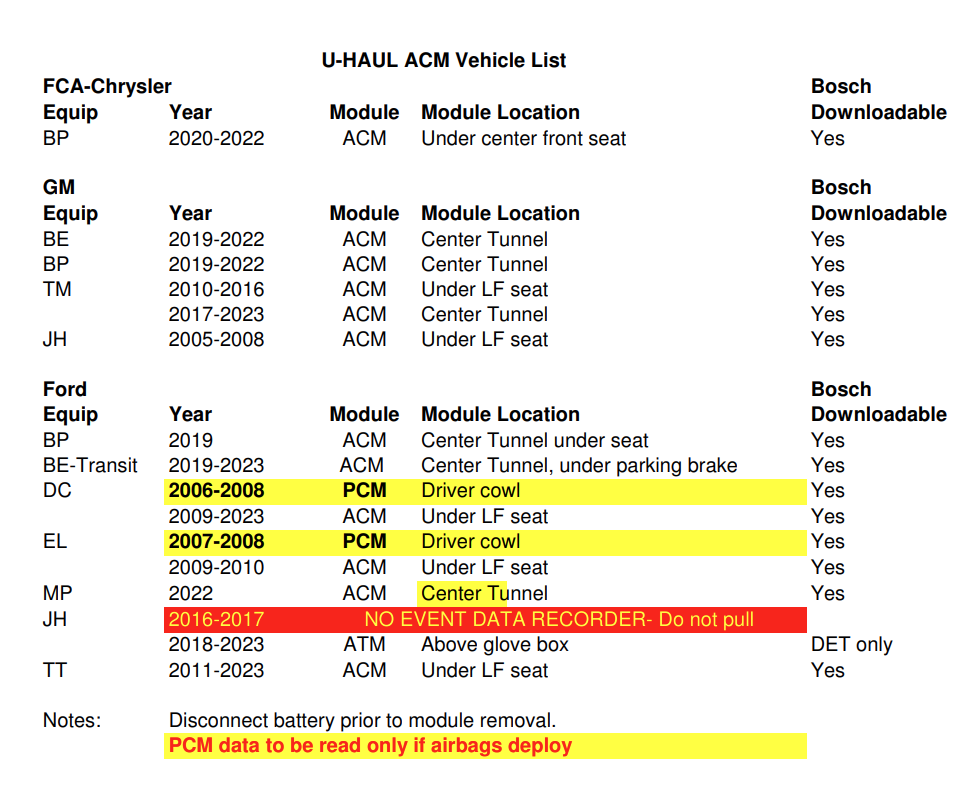


Importing VINs for analysis from M1_3_key_extraction

In [ ]:
vin_analysis_dataframe = pd.read_pickle('working_files/vin_only_dataframe.pkl')

In [ ]:
vin_prefix_to_make_model = {
    '1FDXE4': ('Ford', 'E-450'),
    '1FTNE2': ('Ford', 'E-250'),
    '1FTNR1': ('Ford', 'Transit-150'),
    '1FTYR1': ('Ford', 'Transit-250'),
    '1GTN1L': ('GMC', 'Sierra 1500'),
    '1GDY7R': ('GMC', 'Savana 3500'),
    '1GTW7A': ('GMC', 'Savana 2500'),
    '3C6JR6': ('Ram', '1500'),
    '3GCNAA': ('Chevrolet', 'Silverado 1500'),
    '3GCNWA': ('Chevrolet', 'Silverado 1500')
}

In [ ]:
vin_prefix_to_year_range = {
    '1FDXE4': '2004-2022',
    '1FTNE2': '2008-2014',
    '1FTNR1': '2015-2022',
    '1FTYR1': '2015-2022',
    '1GTN1L': '2009-2022',
    '1GDY7R': '2010-2022',
    '1GTW7A': '2009-2022',
    '3C6JR6': '2013-2022',
    '3GCNAA': '2019-2022',
    '3GCNWA': '2019-2022'
}

In [ ]:
def get_make(vin):
    if vin is None or len(vin) < 6:
        return None
    prefix = vin[:6]
    return vin_prefix_to_make_model.get(prefix)[0] if prefix in vin_prefix_to_make_model else None

def get_model(vin):
    if vin is None or len(vin) < 6:
        return None
    prefix = vin[:6]
    return vin_prefix_to_make_model.get(prefix)[1] if prefix in vin_prefix_to_make_model else None

def get_year_range(vin):
    if vin is None or len(vin) < 6:
        return None
    prefix = vin[:6]
    return vin_prefix_to_year_range.get(prefix)

In [ ]:
import pandas as pd


# Add a 'Make and Model' column to the DataFrame based on the VIN prefix
vin_analysis_dataframe['Make'] = vin_analysis_dataframe['VIN'].apply(get_make)
vin_analysis_dataframe['Model'] = vin_analysis_dataframe['VIN'].apply(get_model)
vin_analysis_dataframe['Year Range'] = vin_analysis_dataframe['VIN'].apply(get_year_range)


print(vin_analysis_dataframe)

Identifying unique models:

In [ ]:
print(len(vin_analysis_dataframe['Model'].unique()))

print(vin_analysis_dataframe['Model'].unique())

Append to the master dataframe the model and year range:

In [ ]:
master_dataframe = pd.read_pickle('working_files/extraction_dataframe_with_keys.pkl')
master_dataframe.head()

Merging data. Data to the left of 'Complete Records' is calculated or altered.

In [ ]:
master_dataframe_with_models = pd.merge(master_dataframe, vin_analysis_dataframe, on='VIN')[['Model','Year Range','Complete Records String','Complete Records','VIN','User','Case Number','EDR Data Imaging Date','Filename','Saved On','Imaged with CDR Version:','Reported with CDR Version:']]
master_dataframe_with_models.head()

In [ ]:
pd.to_pickle(master_dataframe_with_models, 'working_files/master_dataframe_with_models')